In [526]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("../data/iris.csv", names=["sepal_length","sepal_width","patal_width","patal_length","target"])

In [527]:
df.target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [528]:
feature=df[["sepal_length","sepal_width"]]
target=df["target"]
target.replace({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":1}, inplace=True)

In [529]:
from sklearn.model_selection import train_test_split
import numpy as np
score_list=[]
for i in np.linspace(0.009,0.014, 100):
    x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.3,random_state=0)
    model=make_pipeline(#PolynomialFeatures(degree=2),
                        StandardScaler(),
                        SVC(C=0.013, max_iter=10_000, kernel="linear",probability=True))
    model.fit(x_train,y_train)
    score_list.append(model.score(x_test,y_test))

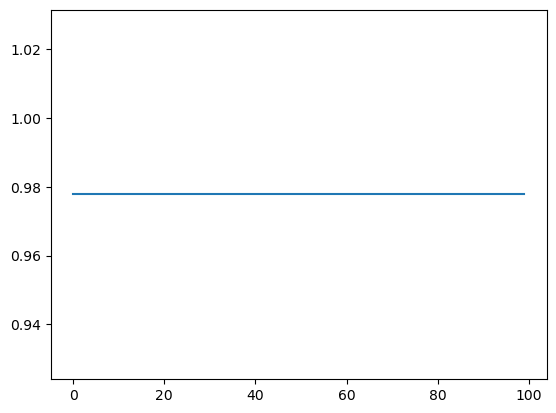

In [530]:
plt.plot( score_list)

In [531]:
# C, kernel, gamma : 하이퍼 파라미터 
y_test.value_counts()

target
1    29
0    16
Name: count, dtype: int64

In [532]:
import numpy as np
scaler=StandardScaler()
scaler.fit(x_train)
new_data=scaler.transform(np.array([[5.2,3.4]]))
print(model.predict(pd.DataFrame(new_data, columns=df.columns[:2]))) # predict로 예측하기

[0]


c:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [533]:
modelf=model.named_steps['svc']
modelf.predict_proba(x_test)

c:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([[3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [4.16529247e-09, 9.99999996e-01],
       [3.00000090e-14, 1.00000000e+00],
       [9.23680298e-10, 9.99999999e-01],
       [3.00000090e-14, 1.00000000e+00],
       [1.93282221e-09, 9.99999998e-01],
       [3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [2.43086792e-10, 1.00000000e+00],
       [3.00000090e-14, 1.00000000e+00],
       [3.08290511e-14, 1.00000000e+00],
       [2.80116500e-10, 1.00000000e+00],
       [1.09617783e-09, 9.99999999e-01],
       [5.59821993e-14, 1.00000000e+00],
       [2.45122779e-13, 1.00000000e+00],
       [5.37056734e-09, 9.99999995e-01],
       [4.52543161e-09, 9.99999995e-01],
       [3.000000

In [534]:
from sklearn.model_selection import cross_validate
cross_validate(model, feature, target, cv=3)

{'fit_time': array([0.00500703, 0.00454998, 0.00501347]),
 'score_time': array([0.00150275, 0.00100017, 0.00200129]),
 'test_score': array([0.96, 0.98, 0.98])}

In [535]:
model.named_steps["svc"]

SVC(C=0.013, kernel='linear', max_iter=10000, probability=True)

In [536]:
coef=model.named_steps["svc"].coef_ # 계산식 
coef[0][0]*new_data[0][0]+coef[0][1]*new_data[0][1]+model.named_steps["svc"].intercept_

array([-0.13034715])

In [537]:
sv=model.named_steps["svc"].support_vectors_.T
sv[0], sv[1]

(array([-1.25284217, -0.67989605, -1.82578828, -0.56530683, -0.22153916,
        -1.48202061, -1.48202061, -1.25284217, -0.9090745 , -1.25284217,
        -1.59660984, -1.13825295, -1.71119906, -1.02366372, -0.9090745 ,
        -1.71119906, -0.56530683, -0.9090745 , -1.13825295, -0.79448528,
        -1.02366372, -0.9090745 , -0.56530683, -0.79448528, -0.10694994,
        -0.9090745 , -1.36743139, -1.02366372, -1.02366372, -0.9090745 ,
        -0.45071761, -0.9090745 , -1.13825295, -1.48202061,  0.92435306,
        -0.33612839,  0.46599617, -1.13825295,  0.1222285 , -0.10694994,
        -0.33612839, -0.33612839, -0.45071761,  0.23681773, -0.22153916,
         0.00763928, -0.9090745 ,  1.49729918, -0.22153916,  0.69517462,
         0.69517462,  0.92435306,  0.35140695,  1.03894229, -0.22153916,
        -1.13825295,  0.1222285 ,  0.46599617, -0.22153916, -0.10694994,
        -0.22153916,  0.5805854 , -0.45071761, -0.10694994, -0.33612839,
         0.00763928,  0.46599617, -0.10694994,  2.0

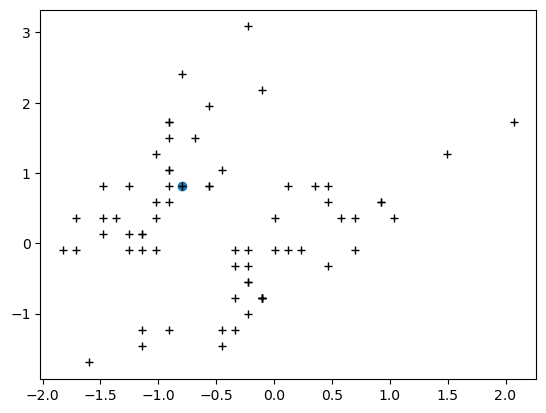

In [538]:
plt.scatter(x=new_data[0][0], y=new_data[0][1]) # 데이터
plt.plot(sv[0], sv[1], "+", color="black") # 서포트벡터


plt.show()

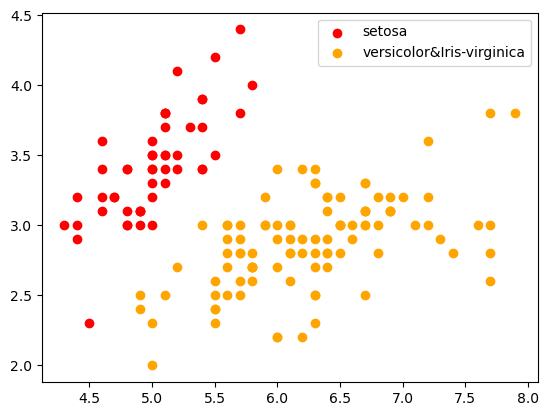

In [539]:
plt.scatter(df[df.target==0]["sepal_length"],df[df.target==0]["sepal_width"],c="red", label="setosa")
plt.scatter(df[df.target==1]["sepal_length"],df[df.target==1]["sepal_width"],c="orange", label="versicolor&Iris-virginica")
plt.legend()
plt.show()

In [540]:
feature=np.array(feature)
target=np.array(target)

1.0
1    37947
0    23653
Name: count, dtype: int64


c:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


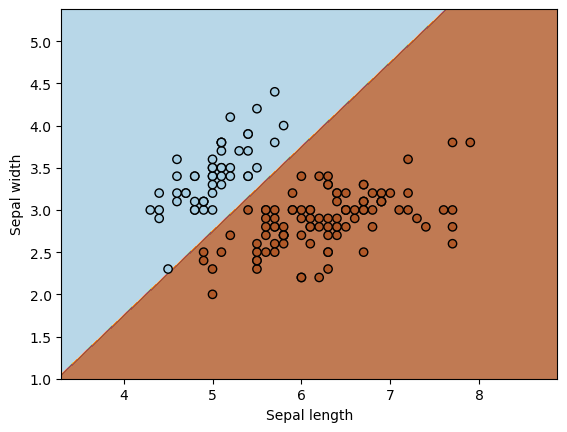

In [541]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
# SVC(C=0.013, kernel='linear', max_iter=10000, probability=True)
clf =   SVC(kernel='linear', C=1)
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

def plot_decision_boundary(model, X, y):
    
    h = .02  # 메쉬 그리드 단위

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    print(pd.DataFrame(Z).value_counts())
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # 데이터 포인트 플로팅
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    

plot_decision_boundary(clf, feature, target)
plt.show()
# model.named_steps["svc"]

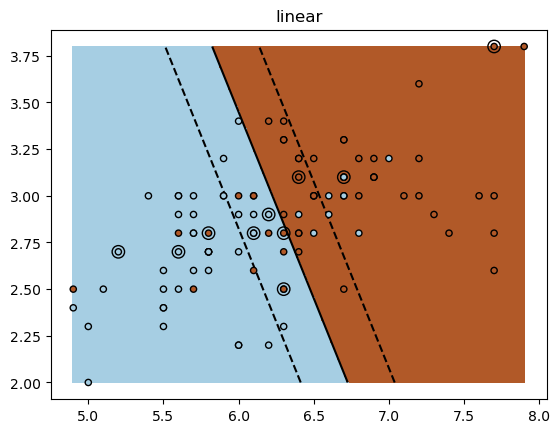

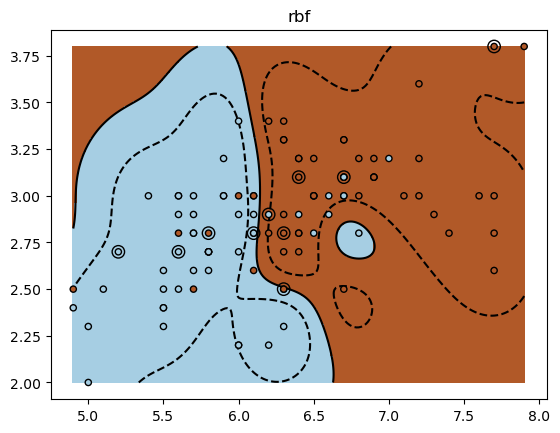

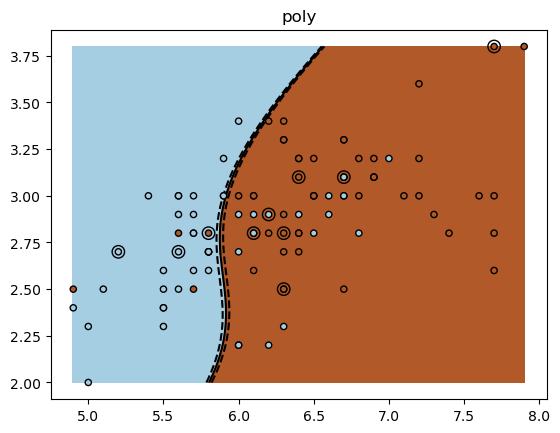

In [542]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(float)

X_train = X[: int(0.9 * n_sample)]
y_train = y[: int(0.9 * n_sample)]
X_test = X[int(0.9 * n_sample) :]
y_test = y[int(0.9 * n_sample) :]

# fit the model
for kernel in ("linear", "rbf", "poly"):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(
        X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
    )

    # Circle out the test data
    plt.scatter(
        X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
    )

    plt.axis("tight")
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.title(kernel)
plt.show()

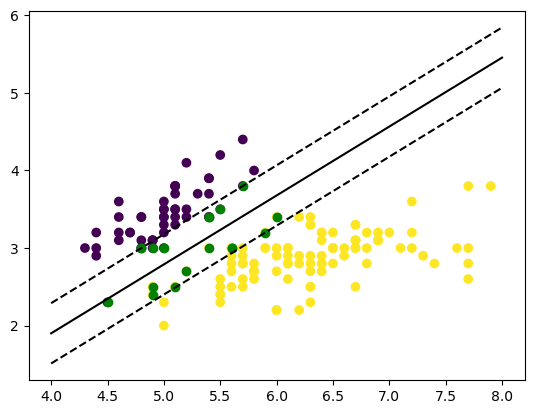

In [543]:
df=pd.read_csv('../data/iris.csv', names=["sepal_length","sepal_width","patal_width","patal_length","target"])
feature=df[df.columns[:2]]
target=df[df.columns[-1]]
target.replace({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":1}, inplace=True) # setosa VS versicolor+virginica

clf = SVC(kernel="linear", C=1)       # => 이 부분만 달라짐, 나머지는 고정
clf.fit(feature, target)

w = clf.coef_[0] # 가중치값 구하기
a = -w[0] / w[1] # 기울기값 구하기
xx = np.linspace(4, 8) # x 정의역 설정 
yy = a * xx - (clf.intercept_[0]) / w[1] # 결정 경계 완성!

# 수학적으로 결정 경계(seperating hyperplane) 주변의 서포트 벡터들은
# 거리가 np.sqrt(1 + a**2)만큼 떨어져 있음 
margin = 1 / np.sqrt(np.sum(clf.coef_**2)) # 입실론 설정 = 1/||w|| = 1/가중치 벡터의 놈(norm)
yy_down = yy - np.sqrt(1 + a**2) * margin # 아래 직선
yy_up = yy + np.sqrt(1 + a**2) * margin # 위 직선

plt.plot(xx, yy, "k-") # 결정 경계 그리기
plt.plot(xx, yy_down, "k--") # 주변 서포트 벡터1
plt.plot(xx, yy_up, "k--") # 주변 서포트 벡터2

# 데이터 점들 찍기
plt.scatter(feature["sepal_length"].values,feature["sepal_width"].values, c=target.values)
# 서포트 벡터 머신 표시
plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],color="green")
plt.show()

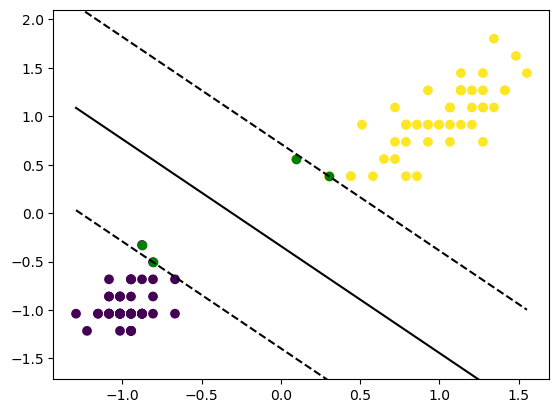

In [552]:
df=pd.read_csv('../data/iris.csv', names=["sepal_length","sepal_width","patal_width","patal_length","target"])
df=df.iloc[:100]
feature=df[df.columns[2:4]]
target=df[df.columns[-1]]
target.replace({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":1}, inplace=True) # setosa VS versicolor+virginica


if True :# 정규화 
    scaler=StandardScaler() 
    scaler.fit(feature)
    feature=pd.DataFrame(scaler.transform(feature), columns=feature.columns)

clf = SVC(kernel="linear", C=1)       # => 이 부분만 달라짐, 나머지는 고정
clf.fit(feature, target)

w = clf.coef_[0] # 가중치값 구하기
a = -w[0] / w[1] # 기울기값 구하기
xx = np.linspace(feature[feature.columns[0]].min(),feature[feature.columns[0]].max()) # x 정의역 설정 
yy = a * xx - (clf.intercept_[0]) / w[1] # 결정 경계 완성!



# 수학적으로 결정 경계(seperating hyperplane) 주변의 서포트 벡터들은
# 거리가 np.sqrt(1 + a**2)만큼 떨어져 있음 
margin = 1 / np.sqrt(np.sum(clf.coef_**2)) # 입실론 설정 = 1/||w|| = 1/가중치 벡터의 놈(norm)
yy_down = yy - np.sqrt(1 + a**2) * margin # 아래 직선
yy_up = yy + np.sqrt(1 + a**2) * margin # 위 직선

plt.plot(xx, yy, "k-") # 결정 경계 그리기
plt.plot(xx, yy_down, "k--") # 주변 서포트 벡터1
plt.plot(xx, yy_up, "k--") # 주변 서포트 벡터2

# 데이터 점들 찍기
plt.scatter(feature["patal_width"].values,feature["patal_length"].values, c=target.values)
# 서포트 벡터 머신 표시
plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],color="green")
plt.ylim(feature[feature.columns[1]].min()-0.5,feature[feature.columns[1]].max()+0.3)
plt.show()

In [ ]:
feature[feature.columns[0]].min()

1.0

([], [])

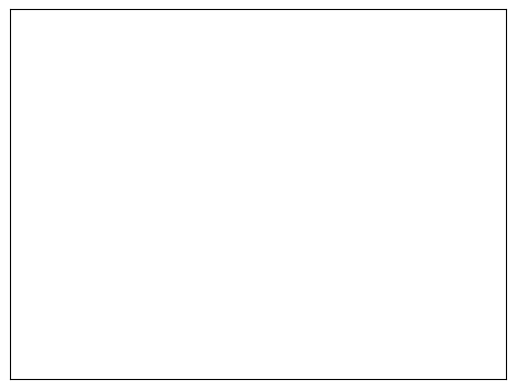

In [ ]:
# YY, XX = np.meshgrid(yy, xx)
# xy = np.vstack([XX.ravel(), YY.ravel()]).T
# Z = clf.decision_function(xy).reshape(XX.shape)

# Put the result into a contour plot
#plt.contourf(XX, YY, Z, cmap=plt.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])

# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)

# plt.xticks(())
# plt.yticks(())